To answer the question we first run a preliminary regression to understand our data. We add in all available controls and also consider the number of tickets. This is to take into account the possibly of bulk discount occuring from purchaising multiple tickets. In some sitautions they may be offered and in other situations they may not be offered. 

Sure, here are the estimating equations with the necessary double dollar signs for LaTeX rendering:

1. **Model with `number_of_tickets`**:
   $$
   \text{price\_per\_ticket} = \beta_0 + \beta_1 \cdot \text{days\_from\_transaction\_until\_game} + \mathbf{\beta_2} \cdot \mathbf{\text{controls}} + \beta_3 \cdot \text{number\_of\_tickets} + \epsilon
   $$

2. **Model without `number_of_tickets`**:
   $$
   \text{price\_per\_ticket} = \beta_0 + \beta_1 \cdot \text{days\_from\_transaction\_until\_game} + \mathbf{\beta_2} \cdot \mathbf{\text{controls}} + \epsilon
   $$

3. **Model with `number_of_tickets` using log price**:
   $$
   \log(\text{price\_per\_ticket}) = \beta_0 + \beta_1 \cdot \text{days\_from\_transaction\_until\_game} + \mathbf{\beta_2} \cdot \mathbf{\text{controls}} + \beta_3 \cdot \text{number\_of\_tickets} + \epsilon
   $$

4. **Model without `number_of_tickets` using log price**:
   $$
   \log(\text{price\_per\_ticket}) = \beta_0 + \beta_1 \cdot \text{days\_from\_transaction\_until\_game} + \mathbf{\beta_2} \cdot \mathbf{\text{controls}} + \epsilon
   $$

Where:
$$
\mathbf{\text{controls}} = \text{day\_game, weekend\_game, sectiontype, gamemonth, team, year}
$$

- $\beta_0$ is the intercept.
- $\beta_1, \beta_3$ are the coefficients for the respective predictor variables.
- $\mathbf{\beta_2}$ is a vector of coefficients for control variables.
- $\epsilon$ is the error term.

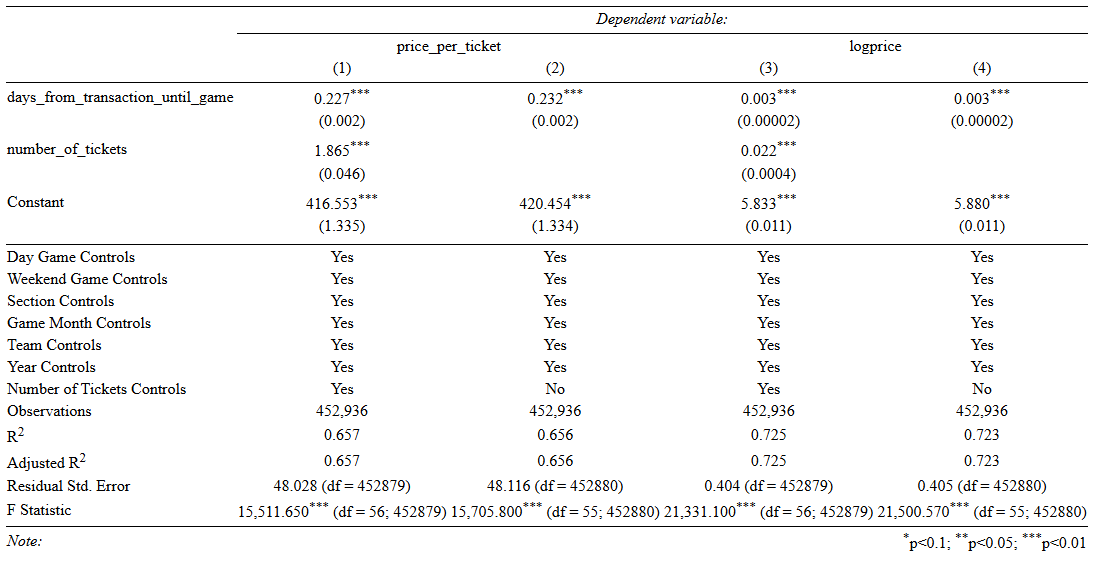

In [8]:
# Import the necessary libraries, including IPython.display and PIL
from IPython.display import Image, display
from PIL import Image as PILImage
# Display Image
image_path = r'C:\Users\clint\Desktop\Coding Task Darthmouth\Red_Sox\Red_Sox\results\0.png'

# Load the image using PIL
img = PILImage.open(image_path)

# Display the image using IPython.display
display(Image(filename=image_path))

The results suggest that the earlier we buy a ticket the more expensive tickets would be. This is counterintuitive, therefore we investigate by doing scatter plots.

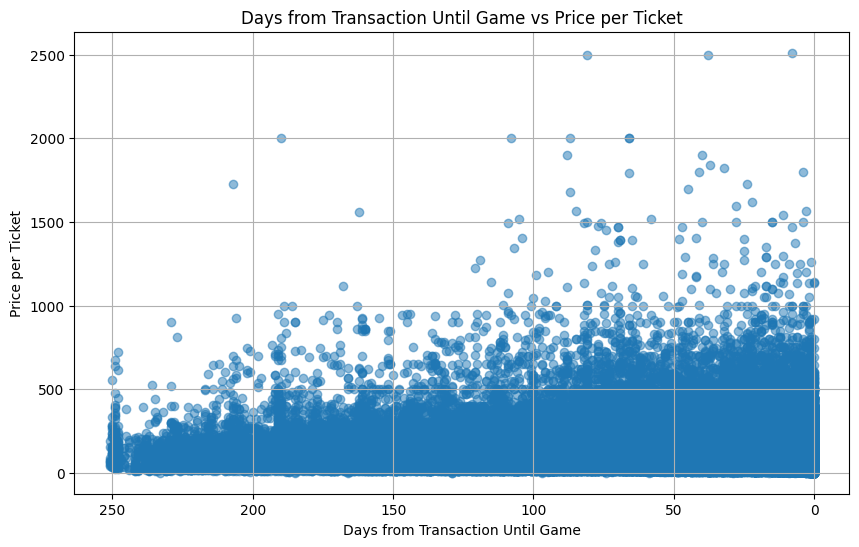

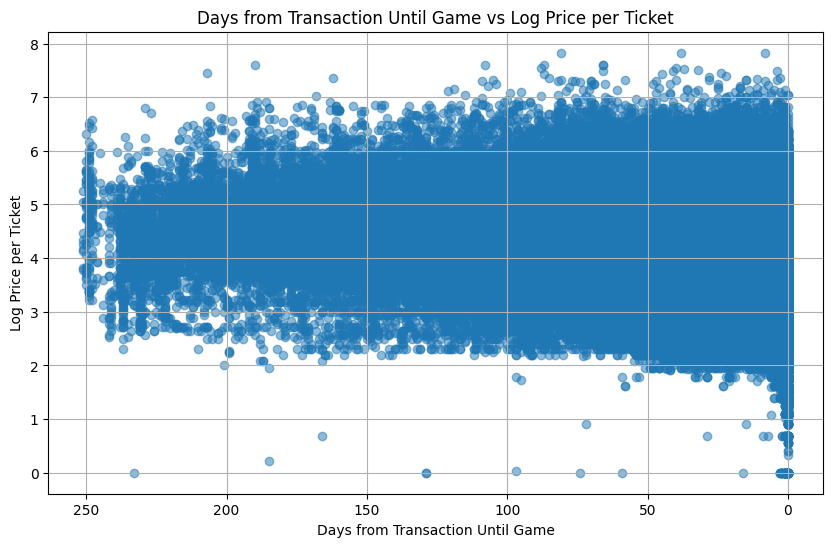

In [6]:
# Define the paths to the images
image_paths = [
    r'C:\Users\clint\Desktop\Coding Task Darthmouth\Red_Sox\Red_Sox\results\1.png',
    r'C:\Users\clint\Desktop\Coding Task Darthmouth\Red_Sox\Red_Sox\results\2.png',
]

# Display each image
for path in image_paths:
    display(Image(filename=path))

Looking at these plots we see that buying early seems to be cheaper than buying later. So this would warrant further investigation. To investigate further, I look into the team with the most  observations (NYY). I also control for other attributes with the most observation within NYY (LowerBleachers, 2 Tickers, April, Evening and Weekend games in 2011). The following are my results.

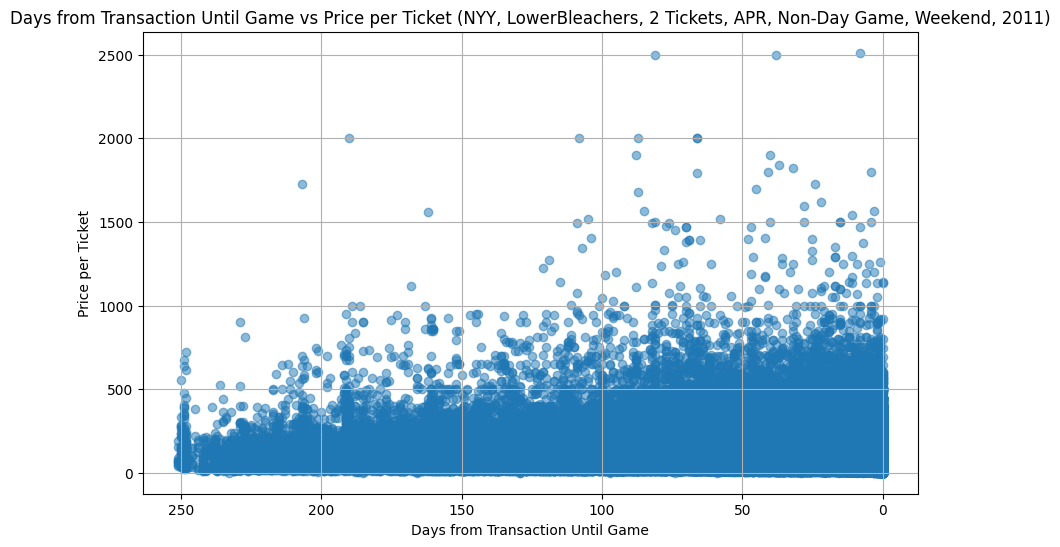

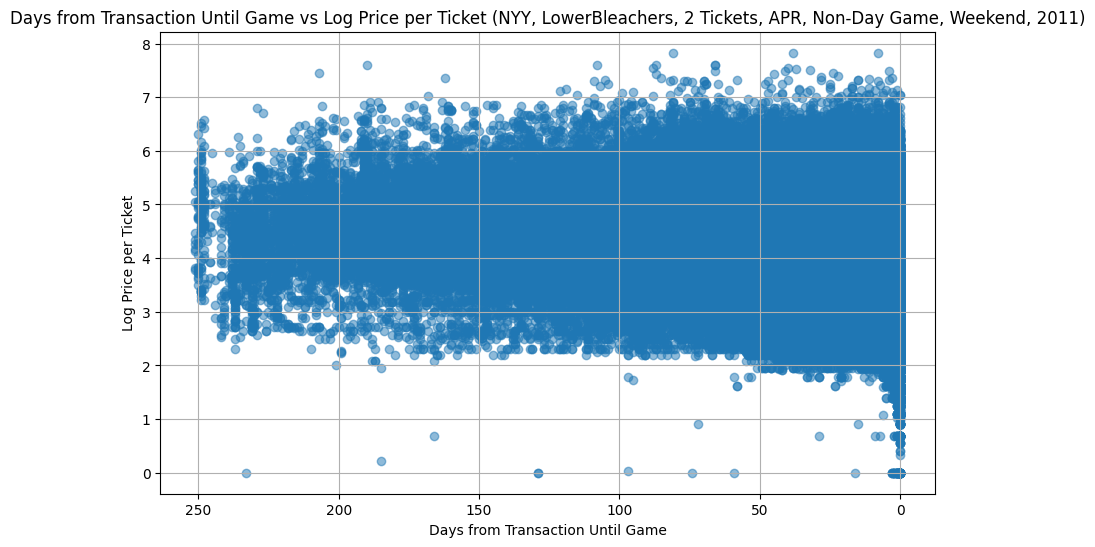

In [7]:
# Define the paths to the images
image_paths = [
    r'C:\Users\clint\Desktop\Coding Task Darthmouth\Red_Sox\Red_Sox\results\3.png',
    r'C:\Users\clint\Desktop\Coding Task Darthmouth\Red_Sox\Red_Sox\results\4.png'
]

# Display each image
for path in image_paths:
    display(Image(filename=path))

The results show similarity to the initial plots we observed from earlier. I suspect the results from the data are due to some noise introduced by price outliers. I clean the data of price outliers manually and rerun the same regressions, mentioned prior.

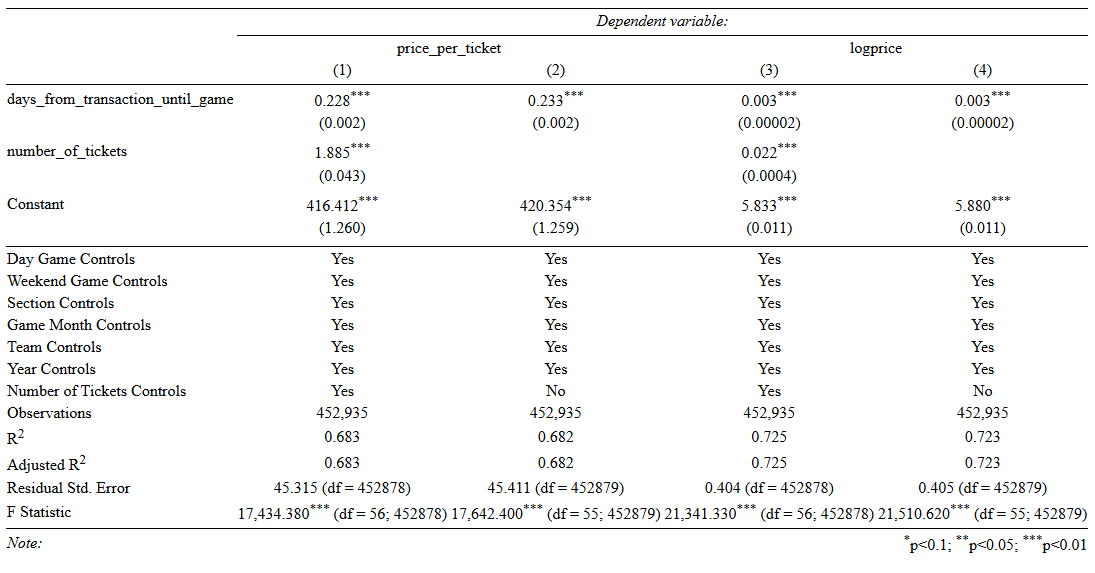

In [9]:
# Define the path to the image
image_path = r'C:\Users\clint\Desktop\Coding Task Darthmouth\Red_Sox\Red_Sox\results\5.png'

# Display the image
display(Image(filename=image_path))

There does not seem to be any significant effect on the results. To further investigate, we use bin scatter plots and show our results again.

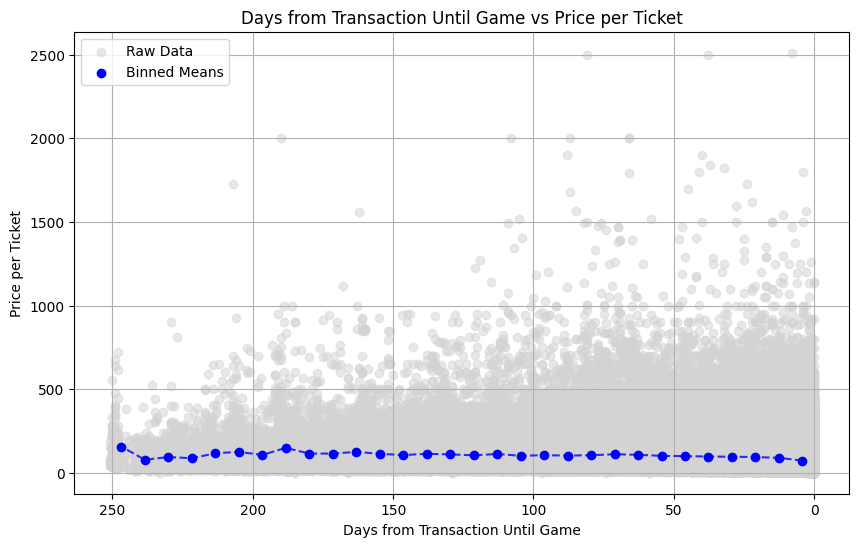

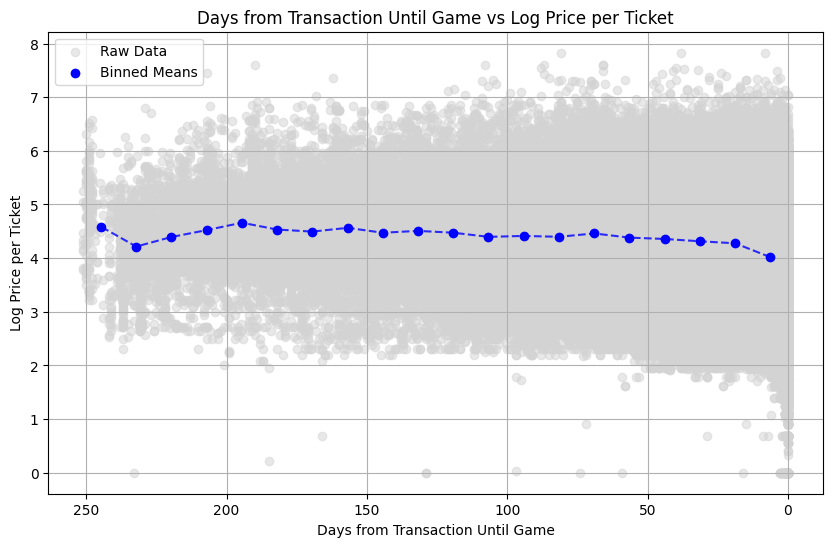

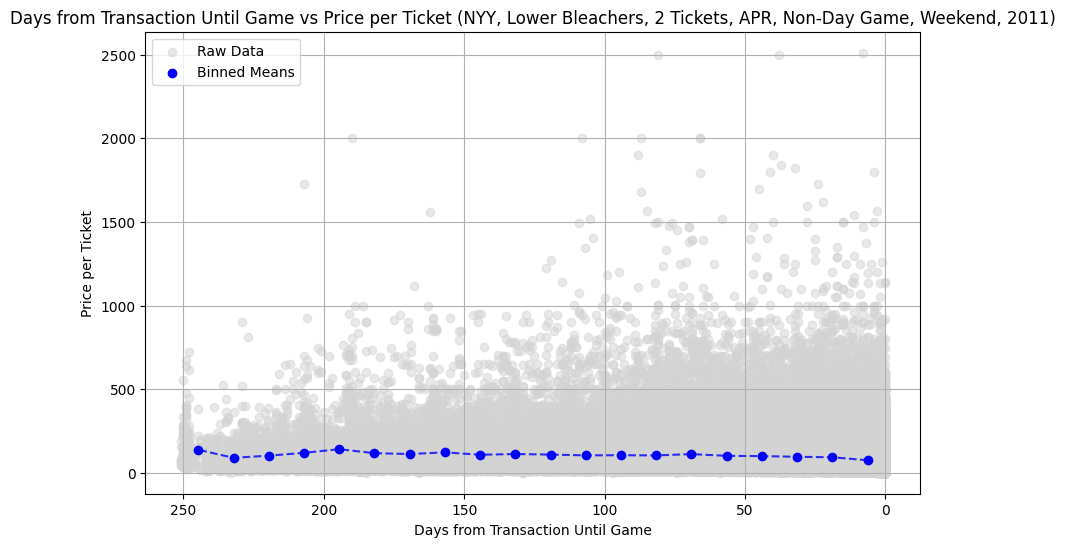

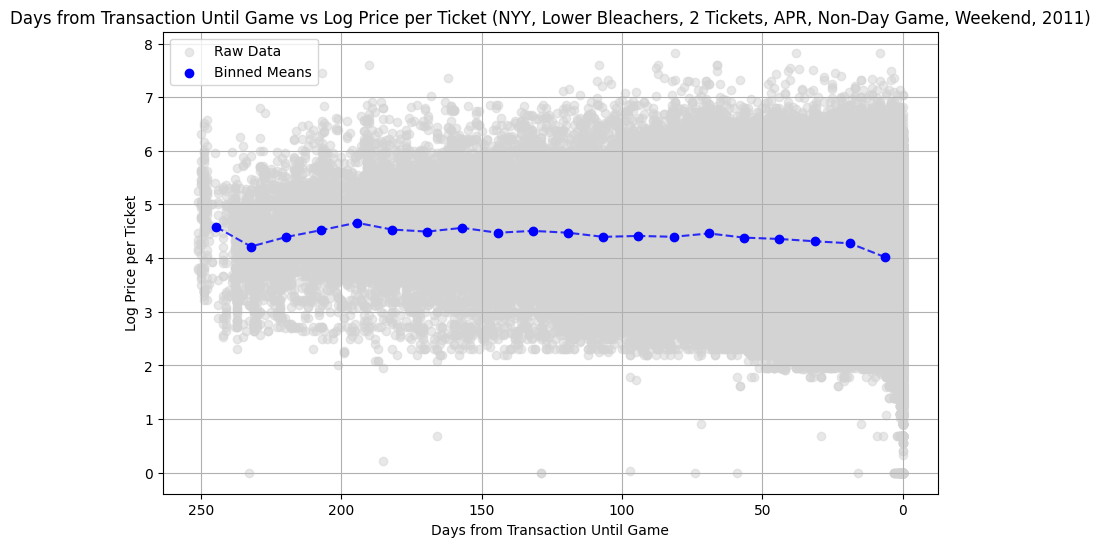

In [12]:
# Define the paths to the images
image_paths = [
    r'C:\Users\clint\Desktop\Coding Task Darthmouth\Red_Sox\Red_Sox\results\7.png',
    r'C:\Users\clint\Desktop\Coding Task Darthmouth\Red_Sox\Red_Sox\results\8.png',
    r'C:\Users\clint\Desktop\Coding Task Darthmouth\Red_Sox\Red_Sox\results\10.png',
    r'C:\Users\clint\Desktop\Coding Task Darthmouth\Red_Sox\Red_Sox\results\11.png'
]

# Display each image
for path in image_paths:
    display(Image(filename=path))

From this we see our regression results makes sense now. There are huge outliers of people who pay more when game day is near (relative to when game day is far). But on average people pay less when buying tickets near game day. So to answer this question How do the prices consumers pay for tickets change as the game date approaches (i.e., as the number of days between transaction date and game date declines)? The initial answer would be the prices **decrease** as game date approaches. To further investigate the dynamic pattern, we would run a quasi "event study" model to investigate. We show the distribution of transaction and see there is bunching happening approximately every 8 days. There are many reasons why this can be happening ranging from discounts/promotions, timing of the games, etc. While we don't know why exactly this is happening we can exploit these observations for our event study model.  

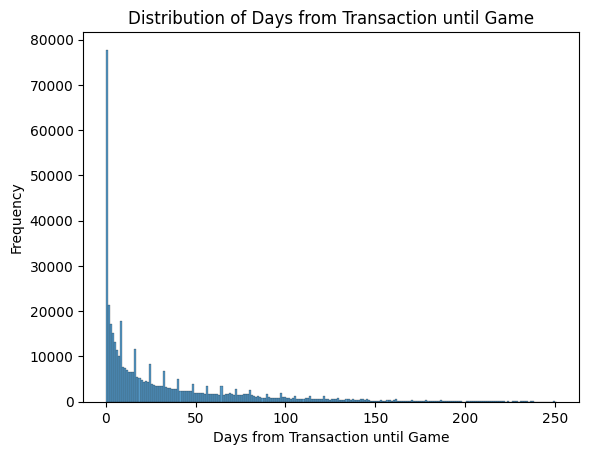

In [10]:
# Define the path to the new image
new_image_path = r'C:\Users\clint\Desktop\Coding Task Darthmouth\Red_Sox\Red_Sox\results\6.png'

# Display the new image
display(Image(filename=new_image_path))

Using this observation we create a "event study" model.

$$
\text{price\_per\_ticket} = \beta_0 + \sum_{j=1}^{n} \beta_{1j} \cdot D_j \cdot \text{days\_from\_transaction\_until\_game}+ \mathbf{\beta_2} \cdot \mathbf{\text{controls}} + \beta_3 \cdot \text{number\_of\_tickets} + \epsilon
$$

### Where:
$$
\mathbf{\text{controls}} = \text{day\_game, weekend\_game, sectiontype, gamemonth, team, year}
$$

- $\beta_0$ is the intercept.
- $\beta_{1j}$ is the coefficient for each range $j$ of days from transaction until game:
  - $D_1 = 1$ if days are in the range $0-8$
  - $D_2 = 1$ if days are in the range $9-16$
  - $D_3 = 1$ if days are in the range $17-24$
  - ...
  - $D_n = 1$ for the last specified range (e.g., $241-250$).
  
- $\mathbf{\beta_2} \cdot \mathbf{\text{controls}}$ represents the control variables included in the model.
- $\beta_3$ is the coefficient for the number of tickets.
- $\epsilon$ is the error term.

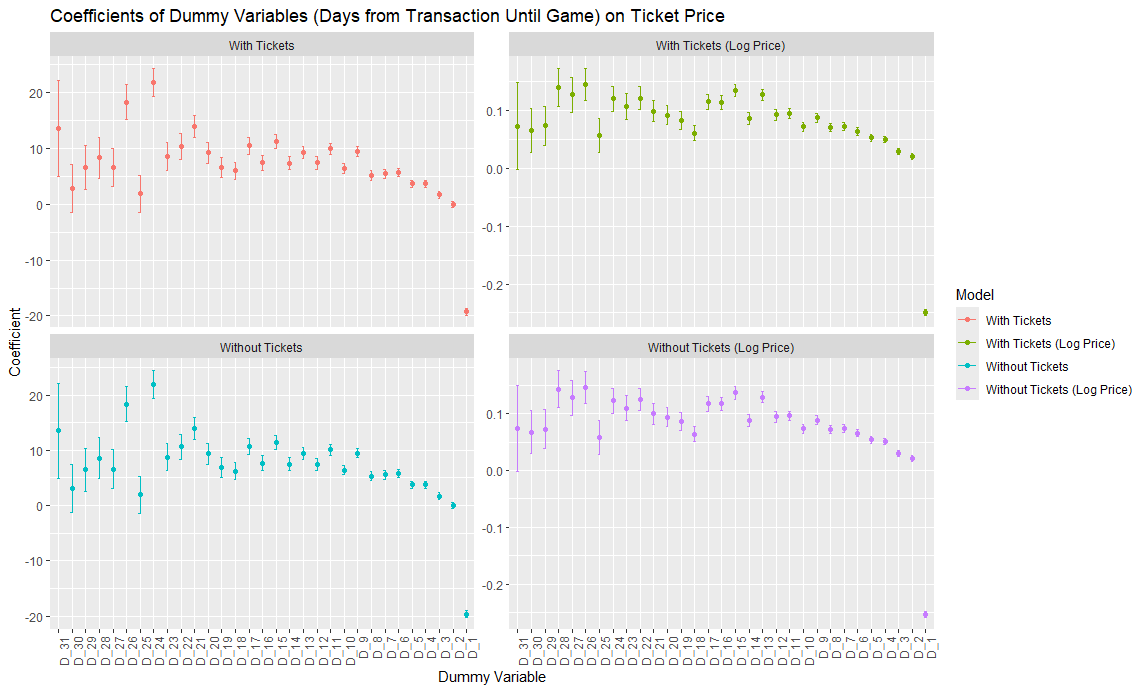

In [17]:
# Define the path to the new image
new_image_path = r'C:\Users\clint\Desktop\Coding Task Darthmouth\Red_Sox\Red_Sox\results\12.png'

# Display the new image
display(Image(filename=new_image_path))

We see from this that the relationship may not be entirely linear. We also see that ticket prices are in fact lower come one week before a game, which supports previous results. One thing we did not take into account for is the bias of human time perception. People typically think of time between weeks, days and months, wherein overly long periods of times are not referred to in weeks but in months. To study this, we run the same model but take into account human biases, instead of cutting the dummy variables in a 8 day basis, we cut up our dummy variables based on human perceptions of months and weeks. 

$$
\text{price\_per\_ticket} = \beta_0 + \sum_{j=1}^{n} \beta_{1j} \cdot D_j \cdot \text{days\_from\_transaction\_until\_game} + \mathbf{\beta_2} \cdot \mathbf{\text{controls}} + \beta_3 \cdot \text{number\_of\_tickets} + \epsilon
$$

### Where:
$$
\mathbf{\text{controls}} = \text{day\_game, weekend\_game, sectiontype, gamemonth, team, year}
$$

- $\beta_0$ is the intercept.
- $\beta_{1j}$ is the coefficient for each range $j$ of weeks and months from the transaction until the game:
  - $D_1 = 1$ if the time until the game is in the range of 0-1 week
  - $D_2 = 1$ if the time until the game is in the range of 1-2 weeks
  - $D_3 = 1$ if the time until the game is in the range of 2-3 weeks
  - $D_4 = 1$ if the time until the game is in the range of 3-4 weeks
  - $D_5 = 1$ if the time until the game is in the range of 4-5 weeks
  - $D_6 = 1$ if the time until the game is in the range of 1-2 months
  - $D_7 = 1$ if the time until the game is in the range of 2-3 months
  - $D_8 = 1$ if the time until the game is in the range of 3-4 months
  - ...
  - $D_n = 1$ if the time until the game is in the range of 8 to 8.3 months, as the data concludes at 250 days.



- $\mathbf{\beta_2} \cdot \mathbf{\text{controls}}$ represents the control variables included in the model.
- $\beta_3$ is the coefficient for the number of tickets.
- $\epsilon$ is the error term.


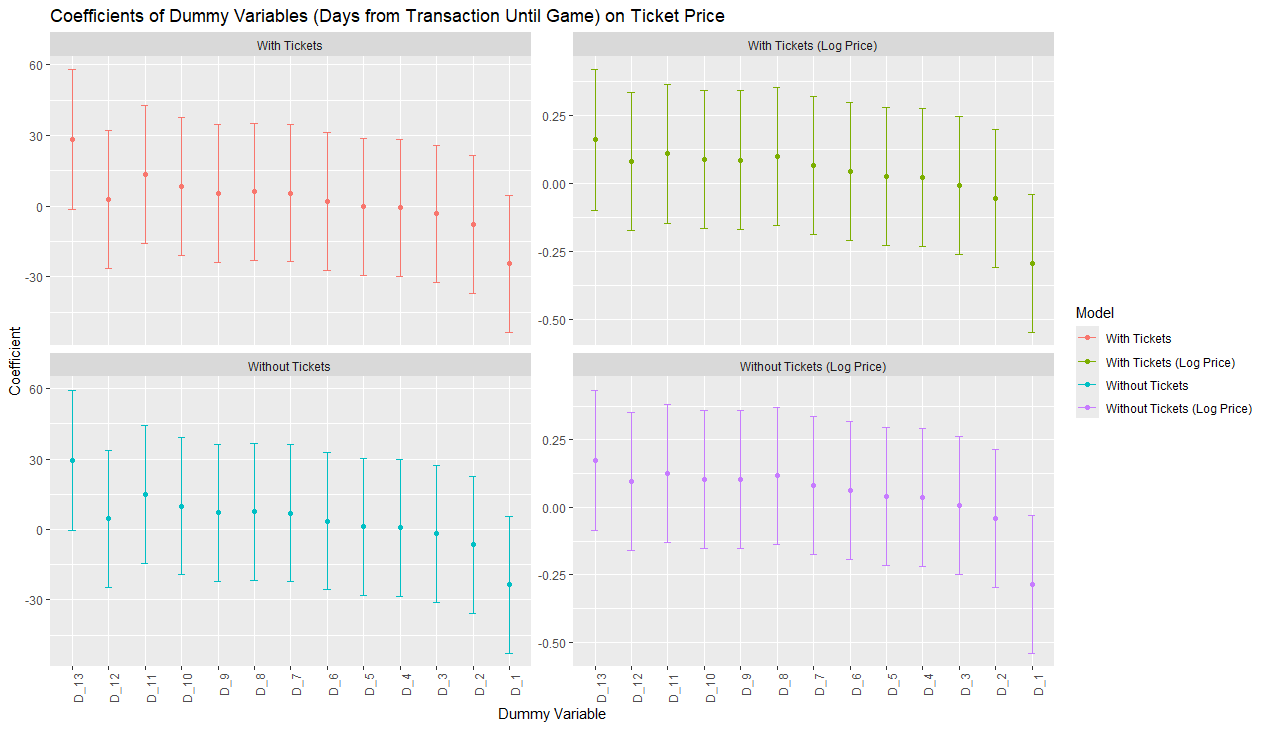

In [18]:
# Define the path to the new image
new_image_path = r'C:\Users\clint\Desktop\Coding Task Darthmouth\Red_Sox\Red_Sox\results\13.png'

# Display the new image
display(Image(filename=new_image_path))

We see smoother and more observable relationship here. All this to suggest that in fact, on average, the later you buy your tickets the cheaper ticket prices would be. Next we study the year differences. We look at the year coefficients of our main model. 

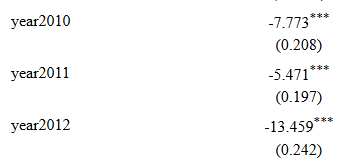

In [19]:
# Define the path to the new image
new_image_path = r'C:\Users\clint\Desktop\Coding Task Darthmouth\Red_Sox\Red_Sox\results\14.png'

# Display the new image
display(Image(filename=new_image_path))

We see that there are significant year fixed effects that could be worth investigating. Next, we run the same analysis restricting our observations within each year. 

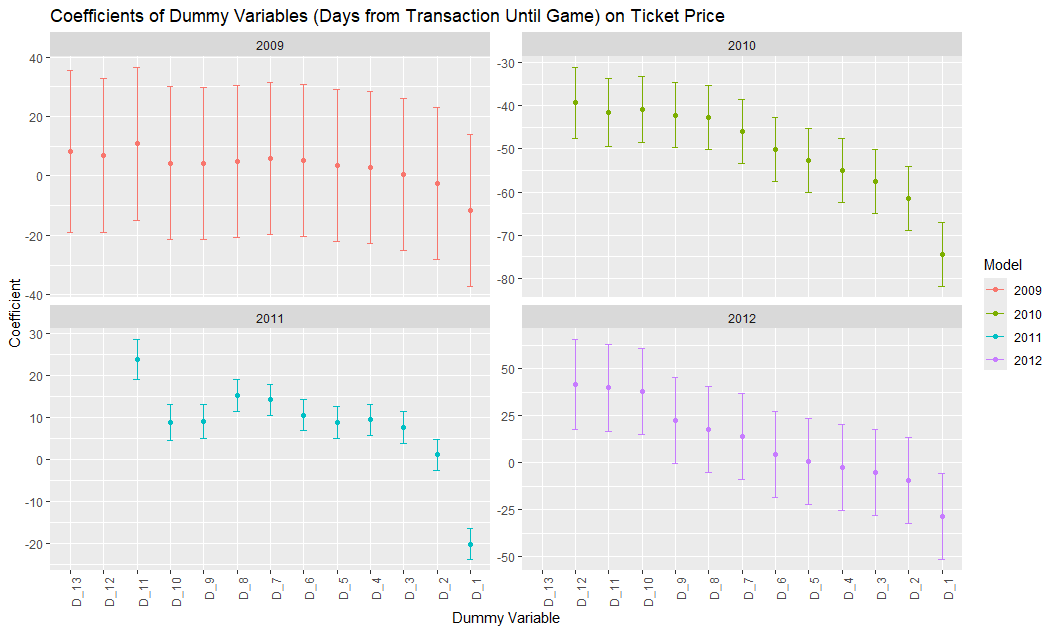

In [20]:
# Define the path to the new image
new_image_path = r'C:\Users\clint\Desktop\Coding Task Darthmouth\Red_Sox\Red_Sox\results\15.png'

# Display the new image
display(Image(filename=new_image_path))

The observed trends reveal an interesting pattern: purchasing tickets well in advance tends to result in higher ticket prices. However, there are variations in this relationship over the years. For instance, in 2009, the standard error is notably large, indicating substantial variability. During this year, some consumers were able to purchase tickets far in advance (approximately 250 days before the game) at prices comparable to those closer to game day. 

In contrast, the dynamics shift in subsequent years, particularly in 2010, 2011, and 2012. The standard error becomes significantly smaller, demonstrating greater consistency in pricing trends. As a result, a clearer pattern emerges: tickets purchased closer to game day are generally cheaper. By 2012, buying tickets just one week before the game consistently results in lower prices, emphasizing the evolving relationship between purchase timing and ticket cost.